# Final phase 03 Project Submission

* Student name: Ingavi Kilavuka
* Student pace: full time
* Dataset: SyriaTel Customer Churn
* Instructor name: Mwikali 

# Executive summary
The project's objective is to utilize data analytics and machine learning methods to improve customer experiences and decrease churn for Syriatel, a top mobile network provider in Syria. In the competitive telecommunications sector, retaining current customers and ensuring their satisfaction are crucial for Syriatel's long-term success and growth. The goals of this project include:
- Determining whether customers are indeed leaving
- How can we best predict the amount of customers leaving
- How can this data assist Syriatel improve customer satisfaction 


## Table of contents 
1. [Business Understanding](#1-business-understanding)
    1. [About Syriatel](#11-about-syriatel)
    1. [Stakeholders](#12-stakeholders)
    1. [Business Problem](#13-business-problem)
    1. [Objectives](#14-objectives)
2. [Data Understanding](#2-data-understanding)
    1. [Data Cleaning](#21-data-cleaning)
3. [EDA](#3-eda)
    1. [Univariate analysis](#31-univariate-analysis)
    2. [Bivariate analysis](#32-bivariate-analysis)
    3. [Encoding](#33-encoding)
                    (1.[Label Encoder](#331-label-encoding))
                    (2.[One-Hot Encoder](#332-one-hot-encoding))
4. [Modeling](#4-modeling)
    1. [Logistic Regression](#41-logistic-regression)
    2. [Decision Tree](#42-decision-tree)
    3. [Random Forest](#43-random-forest)
    4. [KNN](#44-k-nearest-neighbors)
    5. [Roc Curve](#45-roc-curve)
    6. [Feature Importances](#46-feature-importance-all-features)
5. [Evaluation & Recommendations](#5-evaluation--recommendations)
    1. [Churn Preditions](#51-churn-prediction)
    2. [Churn Mitigation](#52-churn-mitigation)
    3. [Other Recommendations](#53-other-recommendations)

# 1. Business understanding

## 1.1 About Syriatel
Syriatel (Arabic: سيريتل) is a leading mobile network provider in Syria, established in January 2000 with its headquarters in Damascus. It is one of the only two mobile service providers in the country, alongside MTN Syria. In 2022, Wafa Telecom was awarded the third telecom license by the Syrian telecommunications authority. Syriatel offers LTE services under the brand name Super Surf, providing speeds up to 150 Mb/s.

Initially, Syriatel operated under a Build-Own-Transfer (BOT) contract for 15 years, with management provided by Orascom. In 2017, the company introduced 4G services. On June 5, 2020, a Syrian court placed Syriatel under judicial custody.

## 1.2 Stakeholders
- **Customers:** Existing customers are directly affected by the company's efforts to reduce churn, which often lead to improved services, better customer support, and enhanced loyalty programs. Customers who experience better service are less likely to leave
- **Management:** Responsible for strategic decision-making, they are directly impacted by customer churn as it affects the company's revenue, profitability, and market position. High churn rates can indicate issues with customer satisfaction or service quality, prompting them to implement corrective measures 
- **Employees:** Job security and career growth for employees can be affected by churn. If high churn rates lead to financial losses, it might result in cost-cutting measures, including layoffs or reduced resources for employee development

## 1.3 Business Problem
Customer churn or attrition, is where customers stop doing business with a company or service provider over a given period.For Syriatel, customer churn happens when subscribers cancel their services or switch to a competitor. High churn rates can significantly impact the company's revenue and growth, making it crucial for businesses to implement strategies to reduce churn and retain customers.

Churn can be categorized into two types:

1. **Voluntary Churn:** This occurs when customers choose to leave a service on their own, often due to dissatisfaction with the service quality, better offers from competitors, or changes in their personal needs.

2. **Involuntary Churn:** This happens when the company terminates the customer's service, often due to non-payment or breaches of contract terms.

Understanding and addressing the factors contributing to churn is essential for Syriatel to maintain a stable customer base and ensure long-term success.


## 1.4 Objectives
- Understand what is causing churn
- Predict church 
- Mitigate churn 

# 2. Data Understanding 

In [327]:
#Imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score

import pickle


In [328]:
# Loading Dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv') 

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [329]:
# Checking for information on data types and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [330]:
#Checking data shape
df.shape

(3333, 21)

In [331]:
# Checking dataset using descriptive statistics 
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [332]:
# Checking for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [333]:
# Checking for duplicate values
df.duplicated().sum()

0

## 2.1 Data Cleaning

In [334]:
def data_cleaning(df):
    missing = df.isna().sum().sum()
    duplicates = df.duplicated().sum()
    return (f"There are {missing} missing values and {duplicates} duplicated values in the dataset")

data_cleaning(df)

'There are 0 missing values and 0 duplicated values in the dataset'

In [335]:
#Dropping Phone number column as it is not useful
df.drop('phone number', axis=1, inplace=True)

In [336]:
# Checking that the column it's dropped.
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

# 3. EDA

## 3.1 Univariate analysis

### Distribution of Churn

In [337]:
# Plotting the target variable distribution
class_counts = df.groupby("churn").size()

fig = go.Figure(
    data=[go.Bar(x=class_counts.index, y=class_counts.values)],
    layout=go.Layout(title="Churn Distribution", xaxis=dict(tickvals=[0, 1], ticktext=["Not Churn", "Churn"]), 
          hovermode = 'closest',width=600)
)

# Show the chart
fig.show()

### Distribution of each predictor column

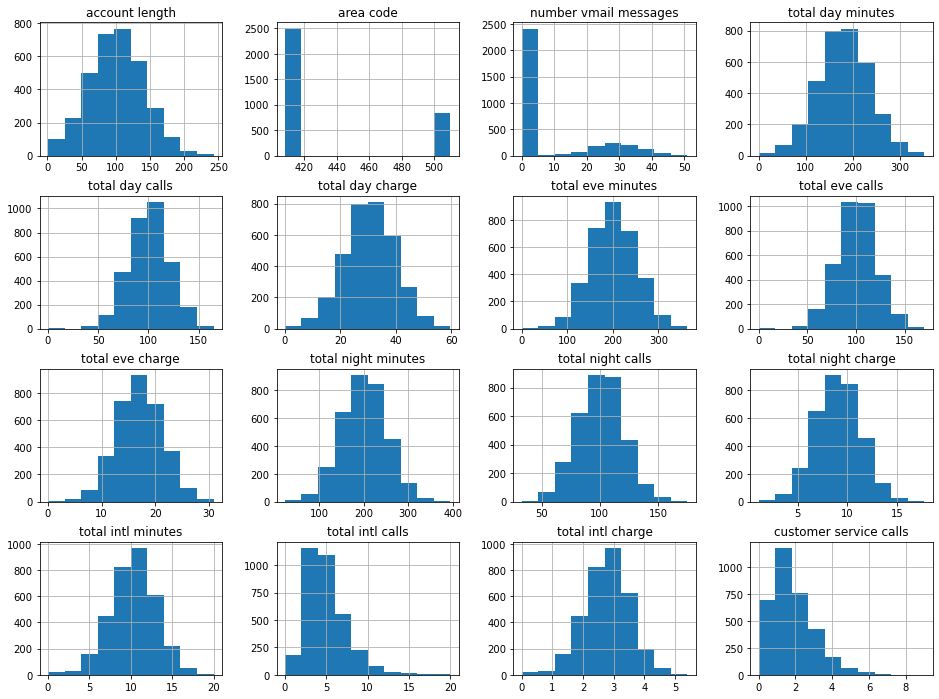

In [338]:
pd.plotting.hist_frame(df.drop('churn',axis=1),figsize=(16,12));

## 3.2 Bivariate analysis

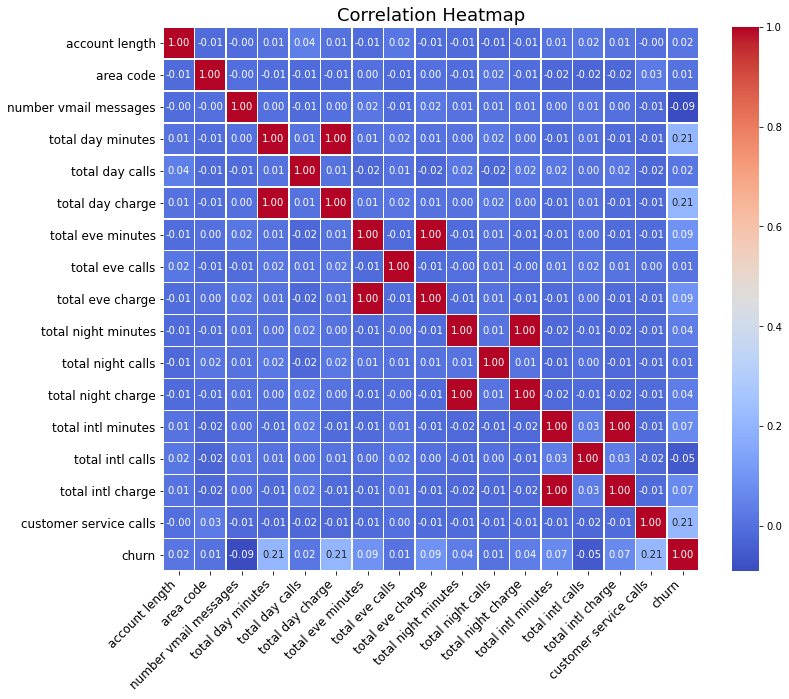

In [339]:
# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()

The majority of features do not show strong correlations, but some demonstrate perfect correlations:
* The features "Total day charge" and "total day minutes" are fully positively correlated.
* The features "Total eve charge" and "total eve minutes" are fully positively correlated.
* The features "Total night charge" and "total night minutes" are fully positively correlated.
* The features "Total int charge" and "total int minutes" are fully positively correlated.

This perfect correlation can be explained by the direct influence of minutes used on the charge.

### Comparing the churn rates for each state

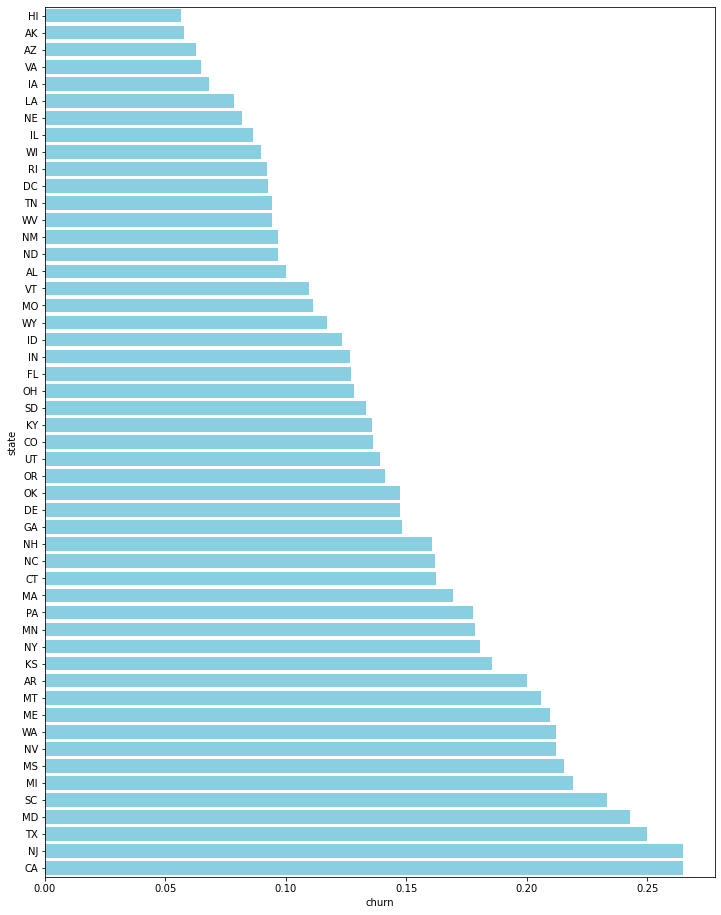

In [340]:
states = df.groupby('state').churn.agg(np.mean)
states.sort_values(ascending=True, inplace=True)
fig,ax = plt.subplots(figsize=(12,16))
sns.barplot(x=states,y=states.index,ax=ax,color='#7ad7f0');

### International plan correlated to churn

In [341]:
print(df.groupby('international plan')['churn'].agg(np.mean))
print(df.groupby('international plan')['churn'].agg(np.std))

international plan
no     0.114950
yes    0.424149
Name: churn, dtype: float64
international plan
no     0.319015
yes    0.494980
Name: churn, dtype: float64


### Voice mail plan correlated to churn

In [342]:
print(df.groupby('voice mail plan')['churn'].agg(np.mean))
print(df.groupby('voice mail plan')['churn'].agg(np.std))

voice mail plan
no     0.167151
yes    0.086768
Name: churn, dtype: float64
voice mail plan
no     0.373188
yes    0.281647
Name: churn, dtype: float64


### Churn by charges

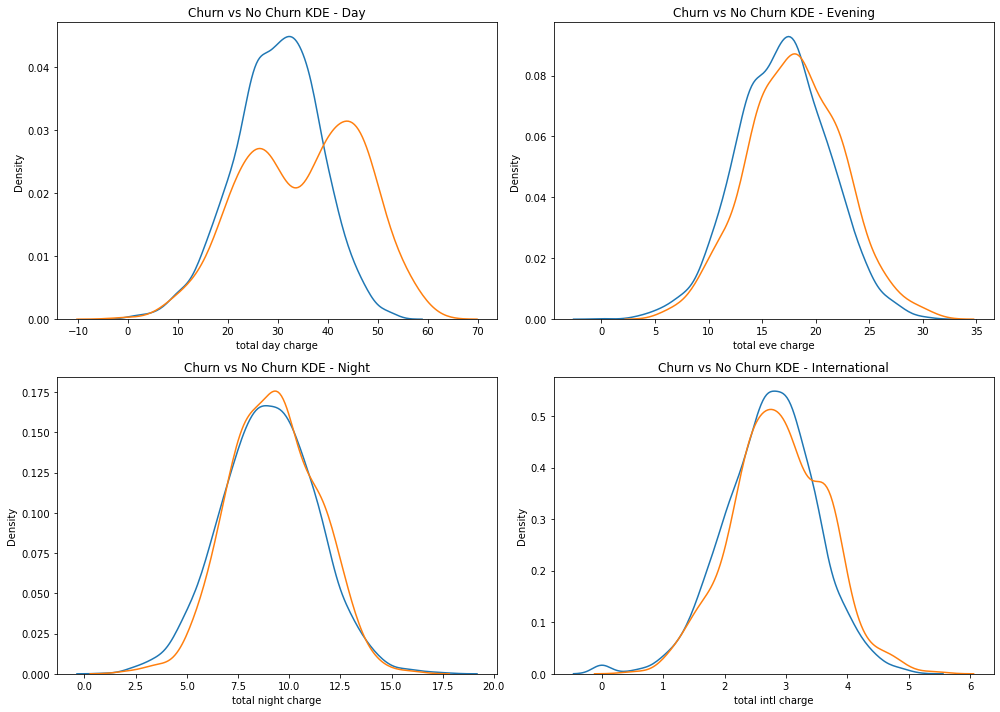

In [343]:
def plot_churn_kde(data, feature, label, ax):
    """Plot KDE for churn vs non-churn for a given feature."""
    sns.kdeplot(data[data['churn'] == False][feature], label=f'No Churn - {label}', ax=ax)
    sns.kdeplot(data[data['churn'] == True][feature], label=f'Churn - {label}', ax=ax)
    ax.set_title(f'Churn vs No Churn KDE - {label}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot each feature in a different subplot
plot_churn_kde(df, 'total day charge', 'Day', axs[0, 0])
plot_churn_kde(df, 'total eve charge', 'Evening', axs[0, 1])
plot_churn_kde(df, 'total night charge', 'Night', axs[1, 0])
plot_churn_kde(df, 'total intl charge', 'International', axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


All these show that the higher the charger the higher the churn

## 3.3 Encoding

### 3.3.1 Label encoding

In [344]:
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == object and set(df[column].unique()) == {'yes', 'no'}:
        df[column] = label_encoder.fit_transform(df[column])

print("\nEncoded DataFrame:")
print(df)



Encoded DataFrame:
     state  account length  area code  international plan  voice mail plan  \
0       KS             128        415                   0                1   
1       OH             107        415                   0                1   
2       NJ             137        415                   0                0   
3       OH              84        408                   1                0   
4       OK              75        415                   1                0   
...    ...             ...        ...                 ...              ...   
3328    AZ             192        415                   0                1   
3329    WV              68        415                   0                0   
3330    RI              28        510                   0                0   
3331    CT             184        510                   1                0   
3332    TN              74        415                   0                1   

      number vmail messages  total day minu

### 3.3.2 One-Hot encoding

In [345]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False, drop='first'), categorical_columns)
    ],
    remainder='passthrough'
)

X_transformed = preprocessor.fit_transform(X)

In [346]:
scaler = MinMaxScaler()

def scaling(columns):
    return scaler.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,0.524793,0.068627,0.0,1.0,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,False
1,OH,0.438017,0.068627,0.0,1.0,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,False
2,NJ,0.561983,0.068627,0.0,0.0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,False
3,OH,0.342975,0.000000,1.0,0.0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,False
4,OK,0.305785,0.068627,1.0,0.0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,False


# 4. Modeling 

## 4.1 Base modeling 

In [347]:
#Defining X and y
X = df.drop("churn", axis=1)
y = df["churn"]

In [348]:
# Performing a test split for the data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [349]:
sm = SMOTE(random_state=42)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

## 4.2 Logistic Regression 

In [350]:
logreg = LogisticRegression(random_state=110)
logreg.fit(X_train_resample, y_train_resample)
y_pred_log = logreg.predict(X_test)

Logistic Regression:
Accuracy: 0.7856071964017991
Precision: 0.390625
Recall: 0.7425742574257426
F1 Score: 0.5119453924914675


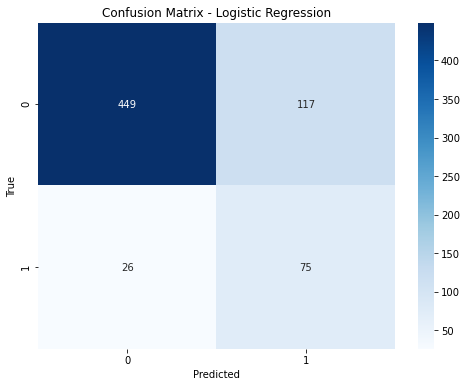

In [351]:
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log, average='binary')
recall = recall_score(y_test, y_pred_log, average='binary')
f1 = f1_score(y_test, y_pred_log, average='binary')

print('Logistic Regression:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## 4.3 Decision Tree

In [352]:
# Decision tree model classifier 
dt = DecisionTreeClassifier(random_state=110)
dt.fit(X_train_resample, y_train_resample)
y_pred_dt = dt.predict(X_test)

Decision Tree:
Accuracy: 0.889055472263868
Precision: 0.6194690265486725
Recall: 0.693069306930693
F1 Score: 0.6542056074766355


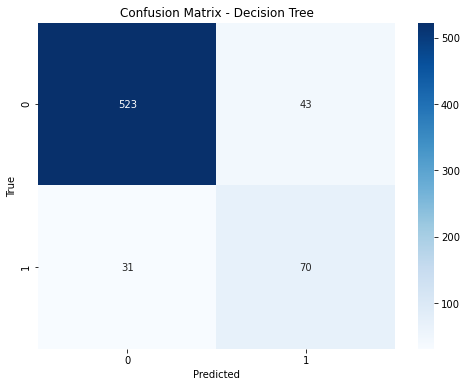

In [353]:
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print('Decision Tree:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 4.4 K-nearest neighbors

In [354]:
# KNN classifier 
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_resample, y_train_resample)
y_pred_knn = knn.predict(X_test)

K-Nearest Neighbors:
Accuracy: 0.7556221889055472
Precision: 0.30128205128205127
Recall: 0.46534653465346537
F1 Score: 0.3657587548638132


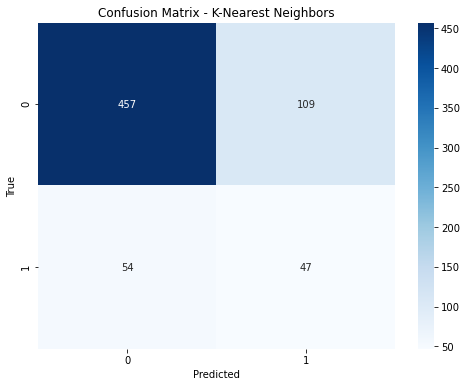

In [355]:
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print('K-Nearest Neighbors:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 4.5 ROC curve

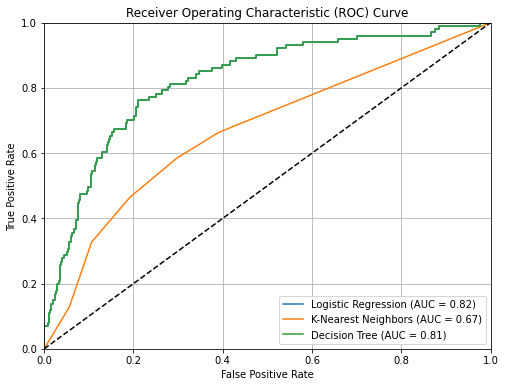

In [356]:
# Logistic Regression
logreg_proba = logreg.predict_proba(X_test)[:, 1]
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_proba)
logreg_auc = roc_auc_score(y_test, logreg_proba)

# Decision Tree
dt_proba = dt.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, logreg_proba)
dt_auc = roc_auc_score(y_test, dt_proba)
# KNN
knn_proba = knn.predict_proba(X_test)[:, 1]  
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_proba)
knn_auc = roc_auc_score(y_test, knn_proba)

plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(logreg_auc))
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbors (AUC = {:.2f})'.format(knn_auc))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Out of one simple (logistic regression) the two complex models (KNN and Decision trees) Decision Trees is the best option to us as it is 89% accurate and has an ROC AUC socre f 81%

In [397]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=110))])

param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

dt_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_resample, y_train_resample)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9441804616516594


## 4.6 Feature Importance (all features)

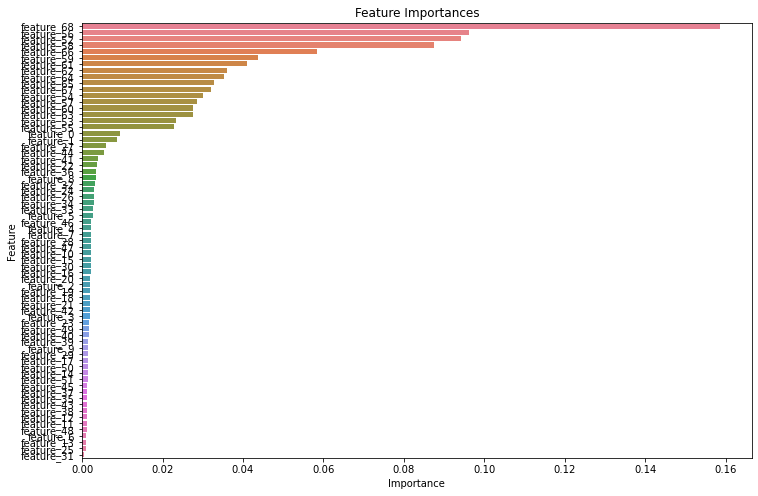

In [383]:
if isinstance(X_test, np.ndarray):
    feature_names = [f'column_{i}' for i in range(X_test.shape[1])]  
    X_test = pd.DataFrame(X_test, columns=feature_names)
else:
    feature_names = X_test.columns

importances = grid_search.best_estimator_.feature_importances_

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

colors = sns.color_palette('husl', len(importances))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette = colors)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


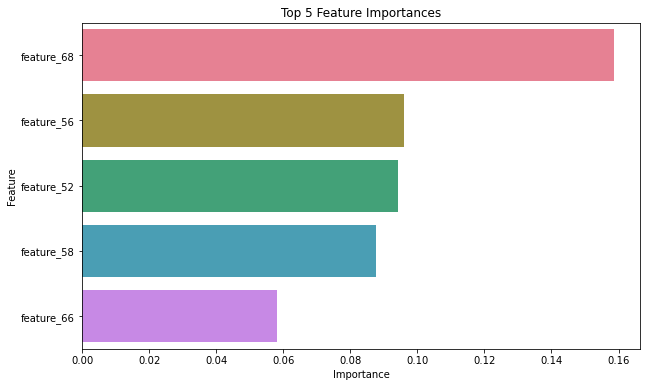

In [387]:
top_features = feature_importances.head(5)

colors = sns.color_palette('husl', len(top_features))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette=colors)
plt.title('Top 5 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [400]:
feature_index_mapping = {index: name for index, name in enumerate(feature_names)}
print(feature_index_mapping)

{0: 'feature_0', 1: 'feature_1', 2: 'feature_2', 3: 'feature_3', 4: 'feature_4', 5: 'feature_5', 6: 'feature_6', 7: 'feature_7', 8: 'feature_8', 9: 'feature_9', 10: 'feature_10', 11: 'feature_11', 12: 'feature_12', 13: 'feature_13', 14: 'feature_14', 15: 'feature_15', 16: 'feature_16', 17: 'feature_17', 18: 'feature_18', 19: 'feature_19', 20: 'feature_20', 21: 'feature_21', 22: 'feature_22', 23: 'feature_23', 24: 'feature_24', 25: 'feature_25', 26: 'feature_26', 27: 'feature_27', 28: 'feature_28', 29: 'feature_29', 30: 'feature_30', 31: 'feature_31', 32: 'feature_32', 33: 'feature_33', 34: 'feature_34', 35: 'feature_35', 36: 'feature_36', 37: 'feature_37', 38: 'feature_38', 39: 'feature_39', 40: 'feature_40', 41: 'feature_41', 42: 'feature_42', 43: 'feature_43', 44: 'feature_44', 45: 'feature_45', 46: 'feature_46', 47: 'feature_47', 48: 'feature_48', 49: 'feature_49', 50: 'feature_50', 51: 'feature_51', 52: 'feature_52', 53: 'feature_53', 54: 'feature_54', 55: 'feature_55', 56: 'featur

### Model saved for use later

In [398]:
filename = 'decision_tree_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(dt, file)

print(f"Model saved to {filename}")


Model saved to decision_tree_model.pkl


# 5. Evaluation & Recommendations

## 5.1 Churn prediction
The decision tree model is 89% accurate and which is a good predictor of Syriatel's customer churn

## 5.2 Churn Mitigation:
- Focus on lower charges as the higher the charge the higher the churn
- Provide lower rates for the states with higher churn rates
- Make international calls cheaper or use dynamic pricing to cater to those less willing to spend on calls
    
## 5.3 Other recommendations:
- Prioritize efforts to retain customers with high predicted churn probabilities.
- Provide tailored incentives and enhance service quality in identified weak areas.
- Ensure top-notch services for high-usage customers who contribute significantly to revenue.
- Expand voice mail plan availability based on its observed impact on churn reduction.
- Actively engage with customers through increased customer service calls to solicit feedback and implement suggestions, as evident by the observed reduction in churn with higher call frequencies. 